## Testing Faulty Cluster creation


In [1]:
import numpy as np
import pandas as pd
import src.online_learning.adaptation_utils.adaptation_due as adaptation
import notebooks.online_learning.utils.plotting_utils as plot
import notebooks.online_learning.utils.loading_utils as load

In [2]:
nominal_cluster_file_path = "data/artificial/nominal_cluster.csv"
#outliers_file_path = "data/artificial/outliers.csv"
outliers_file_path = 'data/artificial/outliers_exponential.csv'

## Artificial Multivariate Gaussian, representative of the nominal cluster( for a cell)

In [4]:
df = load.csv_as_df(file_path=nominal_cluster_file_path)
samples = df.to_numpy()

In [5]:
df.describe()

,r0,rc,c
count,100.000000,100.000000,100.000000
mean,0.750704,0.577736,8074.234495
std,0.915212,1.289762,0.717613
min,-1.276179,-2.158868,8072.673456
25%,0.070971,-0.266138,8073.765155
50%,0.679051,0.491384,8074.207506
75%,1.353802,1.430726,8074.657644
max,3.147951,3.935432,8076.010840


In [6]:
df.head()

,r0,rc,c
0,-0.327479,-1.485506,8073.300330
1,1.287187,1.363845,8074.464434
2,1.418608,2.488245,8076.010840
3,1.365107,1.728898,8075.079138
4,-0.219909,-0.934295,8073.417692


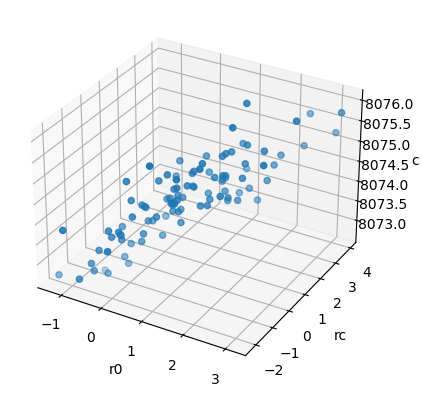

In [7]:
plot.threed_scatter(df)

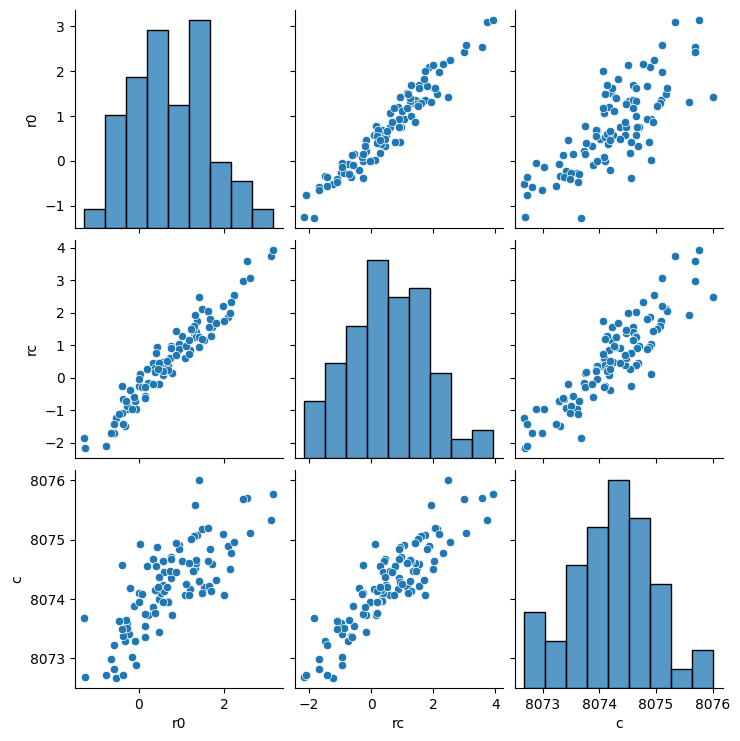

In [8]:
plot.pairwise_scatter(df)

## Generate an array of outliers 

In [11]:
df_outliers = load.csv_as_df(outliers_file_path)
outliers = df_outliers.to_numpy()

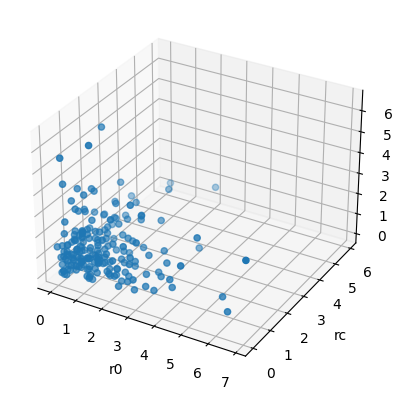

In [12]:
plot.threed_scatter(df_outliers)

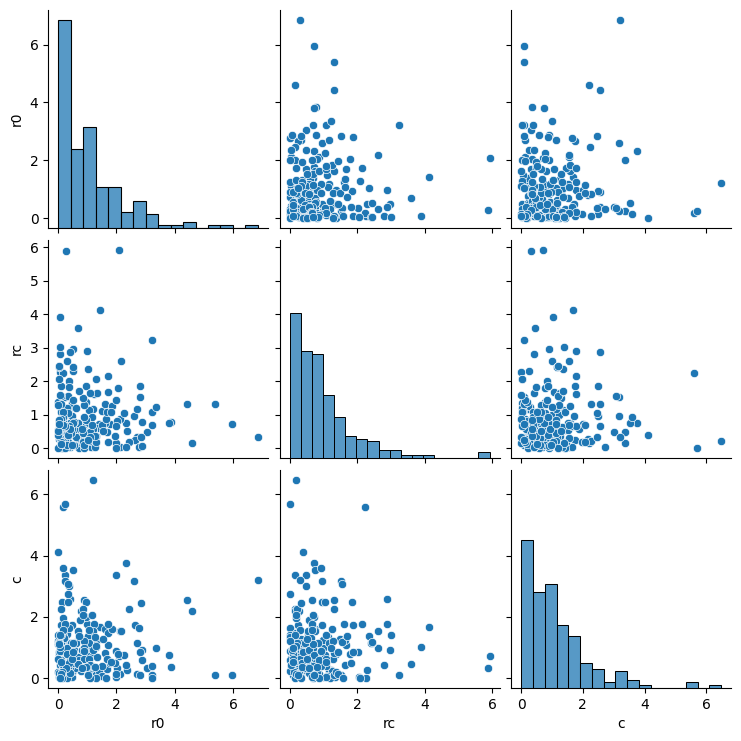

In [13]:
plot.pairwise_scatter(df_outliers)

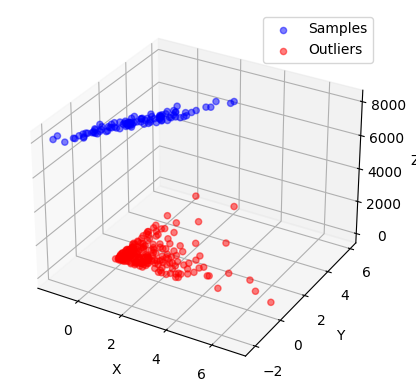

In [16]:
plot.samples_and_outliers(samples=samples,outliers=outliers)

## Faulty cluster  creation

In [17]:
phi = adaptation.fault_cluster_creation( cluster_points=samples, outliers=outliers)

ks_value 0.3333333333333333 p_value 4.004172411040604e-20
Reject the null hypothesis: f_hat and f_tau are different. Create a new cluster.
[[3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-03]
 [3.49986584e-03 6.59290866e-03 3.72448300e-0

In [18]:
phi_data_points = np.array(phi.get_parameters())
df_faulty = pd.DataFrame(phi_data_points, columns=['r0','rc','c'])

In [19]:
df_faulty.describe()

,r0,rc,c
count,99.000000,99.000000,99.000000
mean,0.630481,0.567813,0.693191
std,0.497511,0.389900,0.441932
min,0.003722,0.006593,0.004171
25%,0.156916,0.239265,0.329727
50%,0.519126,0.534765,0.656375
75%,1.071156,0.854008,1.031793
max,1.692743,1.449944,1.560588


In [20]:
df_faulty.head()

,r0,rc,c
0,0.276300,0.984573,0.994019
1,0.106775,0.860964,0.656375
2,0.151661,0.977812,0.016673
3,0.451674,1.228253,0.271576
4,1.691704,0.487840,0.307391


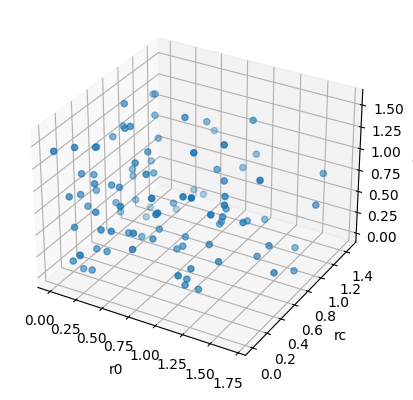

In [21]:
plot.threed_scatter(df_faulty)

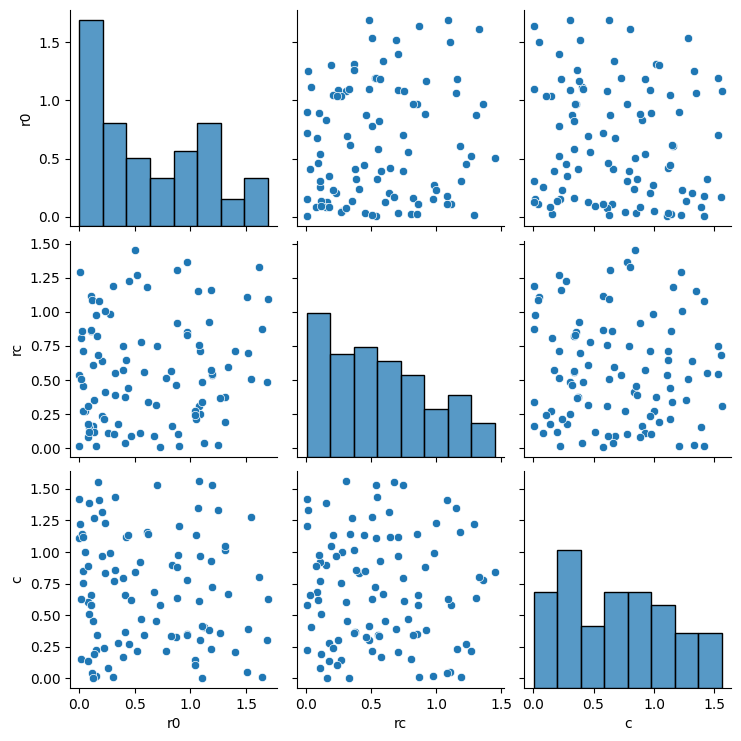

In [22]:
plot.pairwise_scatter(df_faulty)

Nominal cluster compared to the faulty 

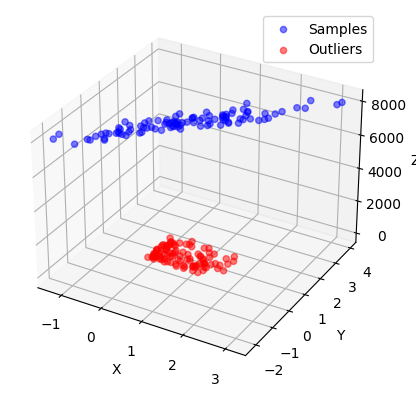

In [26]:
plot.samples_and_outliers(samples=samples,outliers=phi_data_points)